In [38]:
import numpy as np
import pandas as pd
from time import time,sleep
from random import randint as r
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
from sklearn import svm, datasets
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score, confusion_matrix, mean_squared_error, r2_score, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [39]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data)
Y = pd.DataFrame(cancer_data.target)
C = [1, 1.5, 10, 100]
P = [3,5]
gamma = 1/X.shape[1]

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [42]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (455, 30)
Training Labels Shape: (455, 1)
Testing Features Shape: (114, 30)
Testing Labels Shape: (114, 1)


In [43]:
scores = pd.DataFrame(data={'C' : [0,0,0,0,0,0,0,0],
                               'P' : [0,0,0,0,0,0,0,0],
                               'MAE' : [0,0,0,0,0,0,0,0],
                               'Accuracy' : [0,0,0,0,0,0,0,0],
                               'Recall' : [0,0,0,0,0,0,0,0],
                               'F1' : [0,0,0,0,0,0,0,0],
                               'AUC' : [0,0,0,0,0,0,0,0], 
                               'MAE_train' : [0,0,0,0,0,0,0,0],
                               'Accuracy_train' : [0,0,0,0,0,0,0,0],
                               'Recall_train' : [0,0,0,0,0,0,0,0],
                               'F1_train' : [0,0,0,0,0,0,0,0],
                               'AUC_train' : [0,0,0,0,0,0,0,0]})

poly_3_C_1_test
[[31 17]
 [ 0 66]]
poly_3_C_1_train
[[128  36]
 [  0 291]]
poly_3_C_1.5_test
[[33 15]
 [ 0 66]]
poly_3_C_1.5_train
[[132  32]
 [  0 291]]
poly_3_C_10_test
[[44  4]
 [ 0 66]]
poly_3_C_10_train
[[152  12]
 [  0 291]]
poly_3_C_100_test
[[44  4]
 [ 3 63]]
poly_3_C_100_train
[[163   1]
 [  0 291]]
poly_5_C_1_test
[[21 27]
 [ 1 65]]
poly_5_C_1_train
[[105  59]
 [  0 291]]
poly_5_C_1.5_test
[[22 26]
 [ 1 65]]
poly_5_C_1.5_train
[[108  56]
 [  0 291]]
poly_5_C_10_test
[[30 18]
 [ 0 66]]
poly_5_C_10_train
[[124  40]
 [  0 291]]
poly_5_C_100_test
[[37 11]
 [ 1 65]]
poly_5_C_100_train
[[147  17]
 [  0 291]]
       C  P   MAE  Accuracy  Recall      F1     AUC  MAE_train  \
0    1.0  3  0.15    0.8509  1.0000  0.8859  0.8229       0.08   
1    1.5  3  0.13    0.8684  1.0000  0.8980  0.8438       0.07   
2   10.0  3  0.04    0.9649  1.0000  0.9706  0.9583       0.03   
3  100.0  3  0.06    0.9386  0.9545  0.9474  0.9356       0.00   
4    1.0  5  0.25    0.7544  0.9848  0.8228  0.711

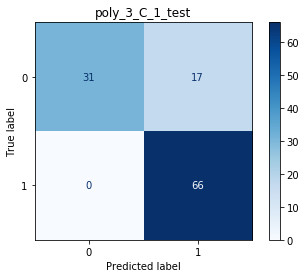

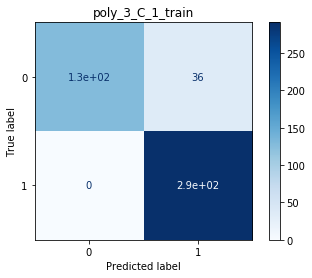

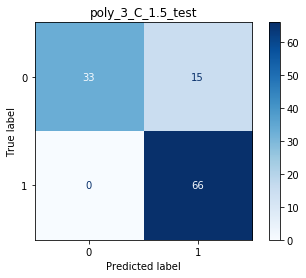

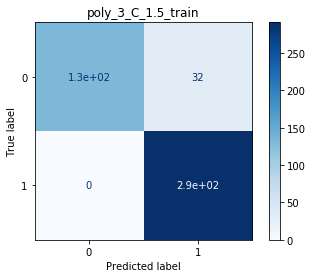

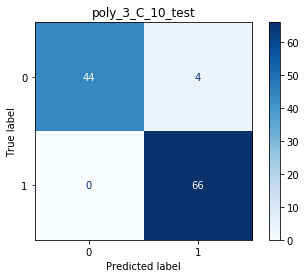

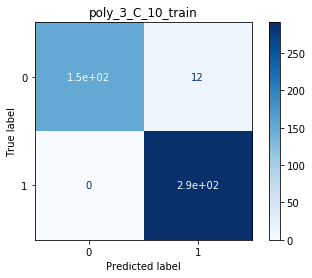

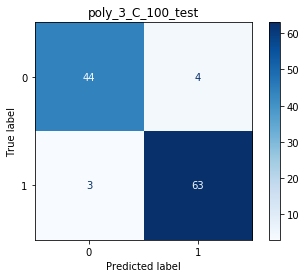

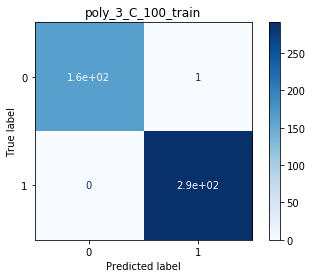

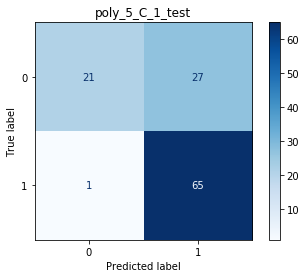

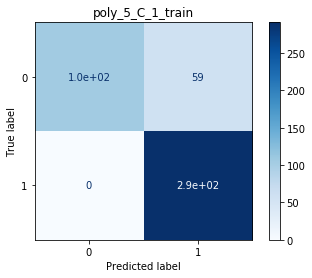

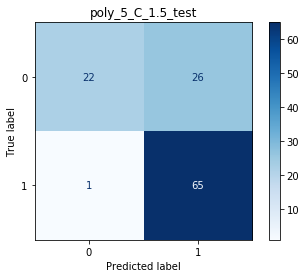

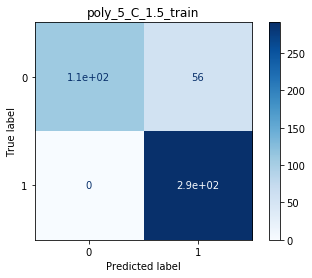

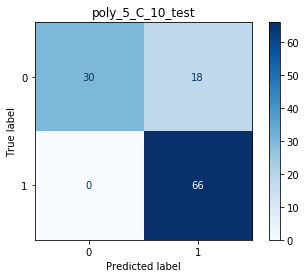

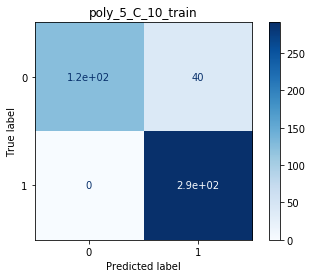

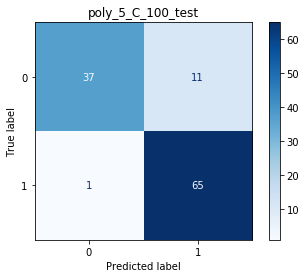

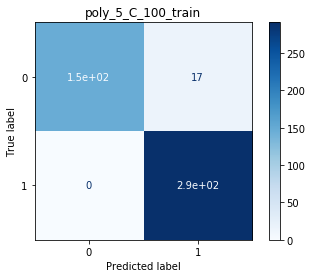

In [50]:
i=0
for p in P:
    for c in C:
        
        plot_title = 'poly_' + str(p) + '_C_' + str(c)
        
        svm_class = svm.SVC(kernel='poly', degree=p, C=c, gamma=gamma)
        svm_class = svm_class.fit(x_train, y_train)
        
        svm_pred = list(svm_class.predict(x_test))
        svm_pred_train = list(svm_class.predict(x_train))

        scores.loc[i,'C'] = c
        scores.loc[i,'P'] = p
        scores.loc[i,'MAE'] = round(np.mean(abs(svm_pred - y_test[0])), 2)
        scores.loc[i,'Accuracy'] = round(accuracy_score(y_test[0], svm_pred), 4)
        scores.loc[i,'Recall'] = round(recall_score(y_test[0], svm_pred), 4)
        scores.loc[i,'F1'] = round(f1_score(y_test[0], svm_pred), 4)
        scores.loc[i,'AUC'] = round(roc_auc_score(y_test[0], svm_pred), 4)
        
        scores.loc[i,'MAE_train'] = round(np.mean(abs(svm_pred_train - y_train[0])), 2)
        scores.loc[i,'Accuracy_train'] = round(accuracy_score(y_train[0], svm_pred_train), 4)
        scores.loc[i,'Recall_train'] = round(recall_score(y_train[0], svm_pred_train), 4)
        scores.loc[i,'F1_train'] = round(f1_score(y_train[0], svm_pred_train), 4)
        scores.loc[i,'AUC_train'] = round(roc_auc_score(y_train[0], svm_pred_train), 4)
        
        
        i = i +1

        plot_title = 'poly_' + str(p) + '_C_' + str(c) + "_test"  
        np.set_printoptions(precision=2)
        titles_options = [(plot_title, None)]
        for title, normalize in titles_options:
            disp = plot_confusion_matrix(svm_class, x_test, y_test[0],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
            disp.ax_.set_title(title)

          

        print(title)
        print(disp.confusion_matrix)
        plt.savefig('Confusion_Matrix_test_'+plot_title+'.png',bbox_inches = 'tight');
        
        plot_title = 'poly_' + str(p) + '_C_' + str(c) + "_train" 
        np.set_printoptions(precision=2)
        titles_options = [(plot_title, None)]
        for title, normalize in titles_options:
            disp = plot_confusion_matrix(svm_class, x_train, y_train[0],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
            disp.ax_.set_title(title)

           

        print(title)
        print(disp.confusion_matrix)
        plt.savefig('Confusion_Matrix_train_'+plot_title+'.png',bbox_inches = 'tight');
        
        
        
print(scores)        
        


In [51]:
scores.to_csv('Chris Breast Cancer Scores.csv')